## Bootstrap Model Performance
The bootstrap can be used to evaluate the performance of machine learning algorithms. This will mean that there will be some samples that are not included in the sample. A model can then be trained on the data sample each bootstrap iteration and evaluated on the out of bag samples to give a performance statistic, which can be collected and from which confidence intervals may be calculated.

statistics = []
for i in bootstraps:
	train, test = select_sample_with_replacement(data, size)
	model = train_model(train)
	stat = evaluate_model(test)
	statistics.append(stat)
    
## Calculate Confidence Interval

ordered = sort(statistics)
lower = percentile(ordered, (1-alpha)/2)
upper = percentile(ordered, alpha+((1-alpha)/2))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#load data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#create a blank list for our statistics
stat_list = []

#a function used to bootstrap a data set
def bootstrap(n_iterations, df):
    for i in range(n_iterations):
        #sample the original data with replacement
        train = df.sample(frac=0.6, replace=True)
        #drop the values in the train set, leaving only unique values
        test = df.drop(train.index)
        #set up train and test data sets
        X_train = train.drop('Outcome', 1).values
        y_train = train.Outcome.values
        X_test = test.drop('Outcome', 1).values
        y_test = test.Outcome.values
        
        #load the model and train it
        DFC = DecisionTreeClassifier()
        DFC.fit(X_train, y_train)
        #make some predictions
        preds = DFC.predict(X_test)
        #score those predictions
        score = accuracy_score(y_test, preds)
        #append the scores to the prior list
        stat_list.append(score)

In [4]:
#run the bootstrap function
bootstrap(500, data)

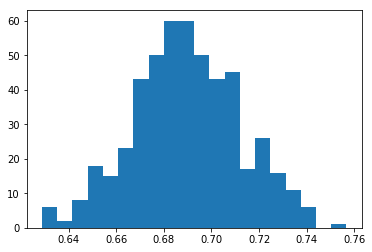

In [5]:
plt.hist(stat_list, bins=20)
plt.show()

In [6]:
def conf_int(alpha, stats):
    p = ((1.0-alpha)/2.0) * 100
    q = (alpha + (1.0-alpha)/2.0) * 100
    lower, upper = np.percentile(stat_list, [p,q])
    print('%.1f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))

In [7]:
conf_int(.95, stat_list)

95.0 confidence interval 64.63% and 73.47%
